In [1]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
# import Housing.csv
path = "./Housing.csv"
housing = pd.read_csv(path)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# In this experiment we will perform LR with only one feature. Let's filter out tha data.
df = housing.loc[:, ['area', 'price']]
df.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


In [4]:
# rescaling variables
df_columns = df.columns
# MinMaxScaler() brings the values of our data between 0-1
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

# Now df is a numpy array, convert into pandas df
df = pd.DataFrame(df)
df.columns = df_columns

df.head()

,area,price
0,0.396564,1.000000
1,0.502405,0.909091
2,0.571134,0.909091
3,0.402062,0.906061
4,0.396564,0.836364


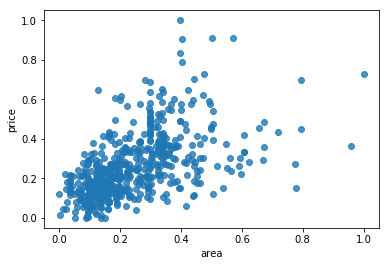

In [5]:
# Visualize area-price relationship
sns.regplot(x="area", y="price", data=df, fit_reg=False)

In [6]:
# split train and test set
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=10)

print(len(df_train))
print(len(df_test))

381
164


In [7]:
# split into X and y for both train and test sets
# reshaping is required since sklearn requires the data to be in shape
# (n, 1), not as a series of shape (n, )
x_train = df_train['area']
x_train = x_train.values.reshape(-1, 1)
y_train = df_train['price']

x_test = df_test['area']
x_test = x_test.values.reshape(-1, 1)
y_test = df_test['price']

### Polynomial Regression

We already know simple linear regression:

$y = \beta_0 + \beta_1 x_1$

In polynomial regression of degree $n$, we fit a curve of the form:

$y = \beta_0 + \beta_1 x_1 + \beta_2x_1^2 + \beta_3x_1^3 ... + \beta_nx_1^n$

In [8]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(x_train), len(degrees)))
y_test_pred = np.zeros((len(x_test), len(degrees)))

for i, degree in enumerate(degrees):
    # make pipeline: creates features and feed them into linear regression model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(x_train)
    y_test_pred[:, i] = model.predict(x_test)

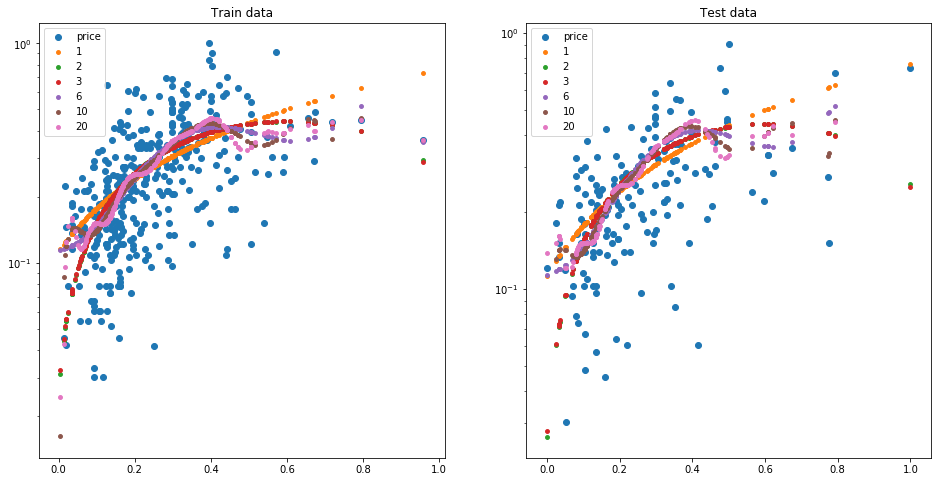

In [9]:
# visualize train and test prediction
plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(x_train, y_train)
plt.yscale('log')
plt.title('Train data')
for i, degree in enumerate(degrees):
    plt.scatter(x_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc="upper left")
    
# test data
plt.subplot(122)
plt.scatter(x_test, y_test)
plt.yscale('log')
plt.title('Test data')
for i, degree in enumerate(degrees):
    plt.scatter(x_test, y_test_pred[:, i], s=15, label=str(degree))
    plt.legend(loc="upper left")

In [10]:
# compare r2 for train and test sets (for all polynomial fits)
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    r2_train = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    r2_test = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train_score: {1}, test_score: {2}".format(degree, r2_train, r2_test))

R-squared values: 

Polynomial degree 1: train_score: 0.29, test_score: 0.25
Polynomial degree 2: train_score: 0.34, test_score: 0.22
Polynomial degree 3: train_score: 0.34, test_score: 0.22
Polynomial degree 6: train_score: 0.36, test_score: 0.11
Polynomial degree 10: train_score: 0.37, test_score: -108.76
Polynomial degree 20: train_score: 0.38, test_score: -307420550201.4


#### So here we gonna choose Polynomial degree of 1, since it's the simplest model(Occam's Razor Principle) and has highest accuracy over test data.